In [1]:
import pandas as pd
import matplotlib.patches as mpatches
from sklearn.linear_model import LinearRegression
import numpy as np
import datetime
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.express as px 
import seaborn as sns
import cufflinks as cf
import plotly as py
py.offline.init_notebook_mode(connected = True)
plt.rcParams.update({'font.size': 32})
cf.go_offline()
sns.set()

## Importing values from csv

In [2]:
IVraw = pd.read_csv('IVraw.csv')
calibrated = pd.read_csv('Calibration Info_truncated.csv')
IV_truncated = pd.read_csv('IVsummary_truncated.csv')
IVraw

,FlashID,PointID,I,V,T,PiraV,PiraT
0,1601,0,7.908000,0.591000,23.430000,0.071938,23.959999
1,1601,1,7.909000,0.647000,23.430000,0.071938,23.959999
2,1601,2,7.909000,0.739000,23.430000,0.071938,23.959999
3,1601,3,7.909000,0.856000,23.430000,0.071938,23.959999
4,1601,4,7.909000,0.977000,23.430000,0.071938,23.959999
...,...,...,...,...,...,...,...
1597,1605,325,0.171694,19.299000,23.620001,0.013879,23.900000
1598,1605,326,0.142211,19.332001,23.620001,0.013879,23.900000
1599,1605,327,0.119889,19.357000,23.620001,0.013879,23.900000
1600,1605,328,0.078601,19.400999,23.620001,0.013879,23.900000


In [3]:
IVraw.shape, IVraw.columns, IV_truncated.columns

((1602, 7),
 Index(['FlashID', 'PointID', 'I', 'V', 'T', 'PiraV', 'PiraT'], dtype='object'),
 Index(['ID', 'Serial', 'DateTime', 'UserName', 'Irradiance', 'TestTemp',
        'ModTemp', 'AmbientTemp', 'PiraTemp', 'LightSourceTemp',
        'TestLightPower', 'CalibFactor', 'RTCName', 'RTCDesc', 'IsSTC',
        'RTCIrrad', 'RTCTemp'],
       dtype='object'))

In [4]:
G1 = calibrated['RefIrradiance']
G2 = IV_truncated['Irradiance']
G2/G1

0    1.020694
1    1.025535
2    1.023106
3    1.019748
4    1.020180
5         NaN
6         NaN
7         NaN
8         NaN
9         NaN
dtype: float64

In [5]:
IV_truncated.shape, IV_truncated.columns

((5, 17),
 Index(['ID', 'Serial', 'DateTime', 'UserName', 'Irradiance', 'TestTemp',
        'ModTemp', 'AmbientTemp', 'PiraTemp', 'LightSourceTemp',
        'TestLightPower', 'CalibFactor', 'RTCName', 'RTCDesc', 'IsSTC',
        'RTCIrrad', 'RTCTemp'],
       dtype='object'))

In [6]:
IV_truncated

,ID,Serial,DateTime,UserName,Irradiance,TestTemp,ModTemp,AmbientTemp,PiraTemp,LightSourceTemp,TestLightPower,CalibFactor,RTCName,RTCDesc,IsSTC,RTCIrrad,RTCTemp
0,1601,FTNK-APV-0000406_STC_1600,5/8/20 12:10 PM,admin,1020.693909,23.430000,23.430000,23.389999,23.959999,22,75,0.993103,STC,Standard Test Condition,1,1000.000000,25
1,1602,FTNK-APV-0000406_800_1601,5/8/20 12:12 PM,admin,811.023560,23.520000,23.520000,23.389999,23.930000,23,58,0.993886,25°C,Corrects only the temperature to 25°C,0,811.023560,25
2,1603,FTNK-APV-0000406_600_1602,5/8/20 12:13 PM,admin,611.551514,23.580000,23.580000,23.400000,24.030001,22,43,0.996030,25°C,Corrects only the temperature to 25°C,0,611.551514,25
3,1604,FTNK-APV-0000406_400_1603,5/8/20 12:14 PM,admin,398.038208,23.620001,23.620001,23.400000,24.010000,23,28,1.004201,25°C,Corrects only the temperature to 25°C,0,398.038208,25
4,1605,FTNK-APV-0000406_200_1604,5/8/20 12:15 PM,admin,204.760422,23.620001,23.620001,23.389999,23.900000,23,15,1.032735,25°C,Corrects only the temperature to 25°C,0,204.760422,25


In [7]:
calibrated.head(10)

,ID,RefModID,UserID,DateTime,CalibFactor,Selected,Irradiance,TestTemp,VOC,ISC,...,RefK,Note,Method,TestPiraSensitivity,TestPiraBaseTemp,TestPiraAlpha,RShunt,RSeries,MachineCode,TestLightPower
0,230,43,2,5/8/20 11:26 AM,0.993103,0,1013.325256,22.969999,37.967480,9.181424,...,0.002616,75%,ISC,0.00007,22,-0.0015,138.716141,0.436686,SIM01,75
1,231,45,2,5/8/20 11:28 AM,0.993886,0,804.951843,23.040001,37.589130,7.256207,...,0.002616,58%,ISC,0.00007,22,-0.0015,213.409821,0.484248,SIM01,58
2,232,47,2,5/8/20 11:31 AM,0.996030,0,606.605652,23.160000,37.126297,5.482743,...,0.002616,43%,ISC,0.00007,22,-0.0015,477.680389,0.565132,SIM01,43
3,233,49,2,5/8/20 11:32 AM,1.004201,0,394.798645,23.219999,36.420864,3.587008,...,0.002616,28%,ISC,0.00007,22,-0.0015,1997.391235,0.756771,SIM01,28
4,234,51,2,5/8/20 11:33 AM,1.032735,0,202.994385,23.240000,35.260868,1.831917,...,0.002616,15%,ISC,0.00007,22,-0.0015,1094.414917,1.192257,SIM01,15
5,235,51,2,5/8/20 12:24 PM,1.030332,0,202.857681,23.170000,35.306965,1.831931,...,0.002616,15%,ISC,0.00007,22,-0.0015,1175.645630,1.187999,SIM01,15
6,236,49,2,5/8/20 12:28 PM,1.002137,0,394.408752,23.230000,36.425701,3.586973,...,0.002616,28%,ISC,0.00007,22,-0.0015,2035.104492,0.733154,SIM01,28
7,237,47,2,5/8/20 12:30 PM,0.993903,0,605.701721,23.320000,37.134125,5.482757,...,0.002616,43%,ISC,0.00007,22,-0.0015,476.605072,0.561895,SIM01,43
8,238,45,2,5/8/20 12:31 PM,0.991522,0,803.230896,23.400000,37.596424,7.256292,...,0.002616,58,ISC,0.00007,22,-0.0015,209.840393,0.484142,SIM01,58
9,239,43,2,5/8/20 12:35 PM,0.990332,0,1010.347473,23.629999,37.971458,9.181958,...,0.002616,75%,ISC,0.00007,22,-0.0015,137.010788,0.433168,SIM01,75


## Manipulating data

In [8]:
calibrated.drop('UserID',1,inplace = True)
calibrated.drop('Selected',1, inplace = True)
calibrated.drop('MachineCode',1, inplace = True)
calibrated

,ID,RefModID,DateTime,CalibFactor,Irradiance,TestTemp,VOC,ISC,PMax,VPmax,...,RefBeta,RefK,Note,Method,TestPiraSensitivity,TestPiraBaseTemp,TestPiraAlpha,RShunt,RSeries,TestLightPower
0,230,43,5/8/20 11:26 AM,0.993103,1013.325256,22.969999,37.967480,9.181424,266.094727,30.848700,...,-0.11666,0.002616,75%,ISC,0.00007,22,-0.0015,138.716141,0.436686,75
1,231,45,5/8/20 11:28 AM,0.993886,804.951843,23.040001,37.589130,7.256207,211.261322,30.865400,...,-0.11666,0.002616,58%,ISC,0.00007,22,-0.0015,213.409821,0.484248,58
2,232,47,5/8/20 11:31 AM,0.996030,606.605652,23.160000,37.126297,5.482743,159.706100,30.818800,...,-0.11666,0.002616,43%,ISC,0.00007,22,-0.0015,477.680389,0.565132,43
3,233,49,5/8/20 11:32 AM,1.004201,394.798645,23.219999,36.420864,3.587008,103.653053,30.624001,...,-0.11666,0.002616,28%,ISC,0.00007,22,-0.0015,1997.391235,0.756771,28
4,234,51,5/8/20 11:33 AM,1.032735,202.994385,23.240000,35.260868,1.831917,51.476841,29.779499,...,-0.11666,0.002616,15%,ISC,0.00007,22,-0.0015,1094.414917,1.192257,15
5,235,51,5/8/20 12:24 PM,1.030332,202.857681,23.170000,35.306965,1.831931,51.581257,29.826099,...,-0.11666,0.002616,15%,ISC,0.00007,22,-0.0015,1175.645630,1.187999,15
6,236,49,5/8/20 12:28 PM,1.002137,394.408752,23.230000,36.425701,3.586973,103.736191,30.579901,...,-0.11666,0.002616,28%,ISC,0.00007,22,-0.0015,2035.104492,0.733154,28
7,237,47,5/8/20 12:30 PM,0.993903,605.701721,23.320000,37.134125,5.482757,159.858337,30.858299,...,-0.11666,0.002616,43%,ISC,0.00007,22,-0.0015,476.605072,0.561895,43
8,238,45,5/8/20 12:31 PM,0.991522,803.230896,23.400000,37.596424,7.256292,211.357620,30.995399,...,-0.11666,0.002616,58,ISC,0.00007,22,-0.0015,209.840393,0.484142,58
9,239,43,5/8/20 12:35 PM,0.990332,1010.347473,23.629999,37.971458,9.181958,266.251770,30.850100,...,-0.11666,0.002616,75%,ISC,0.00007,22,-0.0015,137.010788,0.433168,75


In [9]:
IV_truncated.drop('UserName',1,inplace = True)

### Max Voc and Isc

In [10]:
IVraw['P'] = IVraw['V']*IVraw['I']
IVraw.loc[230:270]

,FlashID,PointID,I,V,T,PiraV,PiraT,P
230,1601,230,7.268181,16.555000,23.43,0.071938,23.959999,120.324736
231,1601,231,7.253000,16.596001,23.43,0.071938,23.959999,120.370789
232,1601,232,7.235834,16.642000,23.43,0.071938,23.959999,120.418745
233,1601,233,7.225366,16.670000,23.43,0.071938,23.959999,120.446854
234,1601,234,7.212177,16.702999,23.43,0.071938,23.959999,120.464991
235,1601,235,7.194967,16.746000,23.43,0.071938,23.959999,120.486924
236,1601,236,7.179000,16.785000,23.43,0.071938,23.959999,120.499512
237,1601,237,7.168973,16.809000,23.43,0.071938,23.959999,120.503267
238,1601,238,7.155701,16.840000,23.43,0.071938,23.959999,120.502009
239,1601,239,7.138387,16.879000,23.43,0.071938,23.959999,120.488827


In [11]:
IVraw.groupby(['FlashID'])['P'].max()

FlashID
1601    120.503267
1602     96.120487
1603     72.275356
1604     46.310899
1605     22.415955
Name: P, dtype: float64

In [12]:
IVraw.groupby(['FlashID'])['V','I'].idxmax()

C:\Users\krish\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,V,I
FlashID,,
1601,341,1
1602,654,343
1603,947,656
1604,1271,948
1605,1601,1272


In [13]:
IVraw.groupby(['FlashID'])['V','I'].max()

C:\Users\krish\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,V,I
FlashID,,
1601,21.367001,7.9090
1602,21.108999,6.2820
1603,20.782000,4.7386
1604,20.284000,3.0984
1605,19.466000,1.5811


In [14]:
x1 = IVraw['V'].loc[0:341]
y1 = IVraw['I'].loc[0:341]
x2 = IVraw['V'].loc[342:654]
y2 = IVraw['I'].loc[342:654]
x3 = IVraw['V'].loc[655:947]
y3 = IVraw['I'].loc[655:947]
x4 = IVraw['V'].loc[948:1271]
y4 = IVraw['I'].loc[948:1271]
x5 = IVraw['V'].loc[1272:1601]
y5 = IVraw['I'].loc[1272:1601]


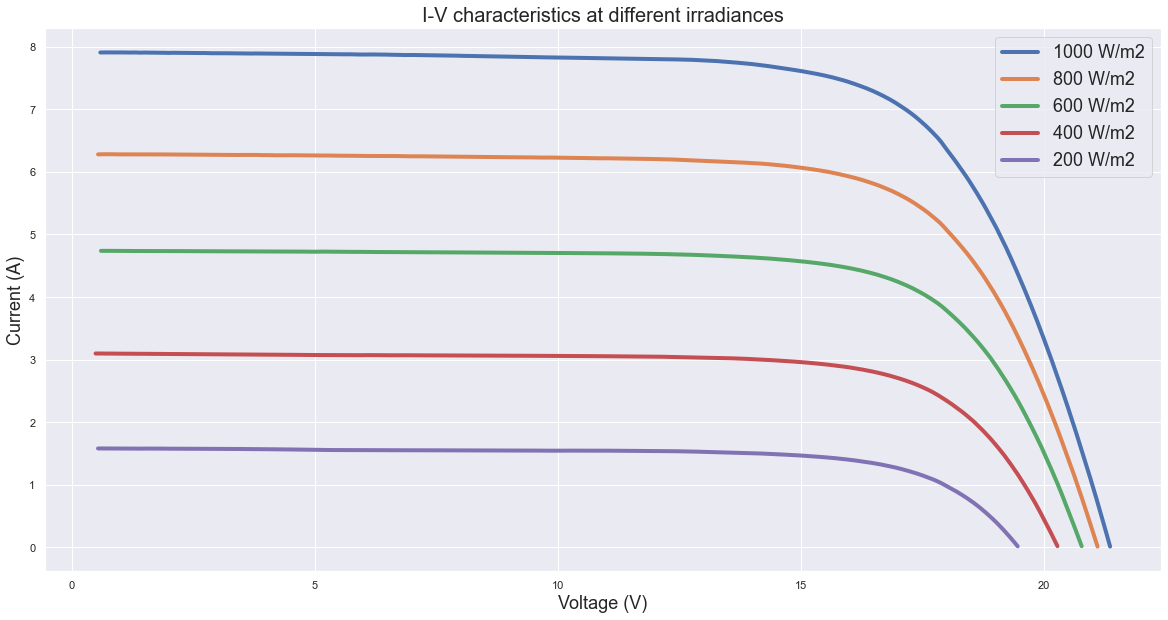

In [15]:
fig, ax = plt.subplots( figsize=(20,10))
plt.title('I-V characteristics at different irradiances',fontsize=20)
plt.xlabel('Voltage (V)',fontsize=18)
plt.ylabel ('Current (A)',fontsize=18)
sns.set_palette('nipy_spectral')

ax.plot(x1,y1,label='1000 W/m2',linewidth=4.0)
ax.plot(x2,y2,label='800 W/m2',linewidth=4.0)
ax.plot(x3,y3,label='600 W/m2',linewidth=4.0)
ax.plot(x4,y4,label='400 W/m2',linewidth=4.0)
ax.plot(x5,y5,label='200 W/m2',linewidth=4.0)

plt.legend(loc='upper right',fontsize=18)
plt.savefig('IV-curve-different-irradiance-level.png')

In [56]:
new_IV_raw = pd.read_csv('New_IV_raw.csv', delimiter=',')
new_IV_raw.head()

,FlashId,I,V,Unnamed: 3,Unnamed: 4,Irradiance,R_s,R_sh
0,1601,7.758753,0.000000,NaN,NaN,1000.0,0.464876,8.076231
1,1601,7.753752,0.450321,NaN,NaN,800.0,0.636240,10.040714
2,1601,7.754733,0.506321,NaN,NaN,600.0,0.657907,13.258709
3,1601,7.754733,0.598321,NaN,NaN,400.0,0.917904,19.483491
4,1601,7.754733,0.715321,NaN,NaN,200.0,1.761093,67.723741


In [57]:
new_1601 = new_IV_raw[new_IV_raw['FlashId'] == 1601]
new_1602 = new_IV_raw[new_IV_raw['FlashId'] == 1602]
new_1603 = new_IV_raw[new_IV_raw['FlashId'] == 1603]
new_1604 = new_IV_raw[new_IV_raw['FlashId'] == 1604]
new_1605 = new_IV_raw[new_IV_raw['FlashId'] == 1605]

new_1602.tail()

,FlashId,I,V,Unnamed: 3,Unnamed: 4,Irradiance,R_s,R_sh
656,1602,0.250733,20.882663,NaN,NaN,NaN,NaN,NaN
657,1602,0.176827,20.913664,NaN,NaN,NaN,NaN,NaN
658,1602,0.086482,20.951662,NaN,NaN,NaN,NaN,NaN
659,1602,0.012833,20.982662,NaN,NaN,NaN,NaN,NaN
660,1602,0.000000,21.000000,NaN,NaN,NaN,NaN,NaN


In [58]:
x1 = new_1601['V']
y1 = new_1601['I']
x2 = new_1602['V']
y2 = new_1602['I']
x3 = new_1603['V']
y3 = new_1603['I']
x4 = new_1604['V']
y4 = new_1604['I']
x5 = new_1605['V']
y5 = new_1605['I']

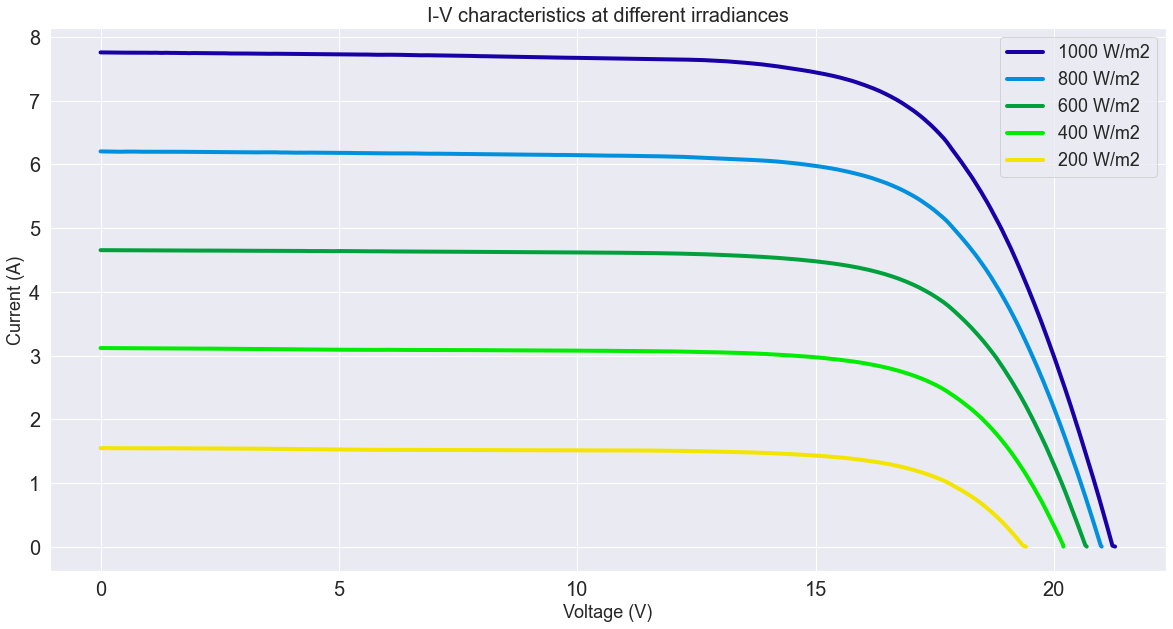

In [62]:
fig, ax = plt.subplots( figsize=(20,10))
plt.title('I-V characteristics at different irradiances',fontsize=20)
plt.xlabel('Voltage (V)',fontsize=18)
plt.ylabel ('Current (A)',fontsize=18)
sns.set_palette('nipy_spectral')

ax.plot(x1,y1,label='1000 W/m2',linewidth=4.0)
ax.plot(x2,y2,label='800 W/m2',linewidth=4.0)
ax.plot(x3,y3,label='600 W/m2',linewidth=4.0)
ax.plot(x4,y4,label='400 W/m2',linewidth=4.0)
ax.plot(x5,y5,label='200 W/m2',linewidth=4.0)

plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.legend(loc='upper right',fontsize=18)
plt.savefig('IV-curve-different-irradiance-level.png')

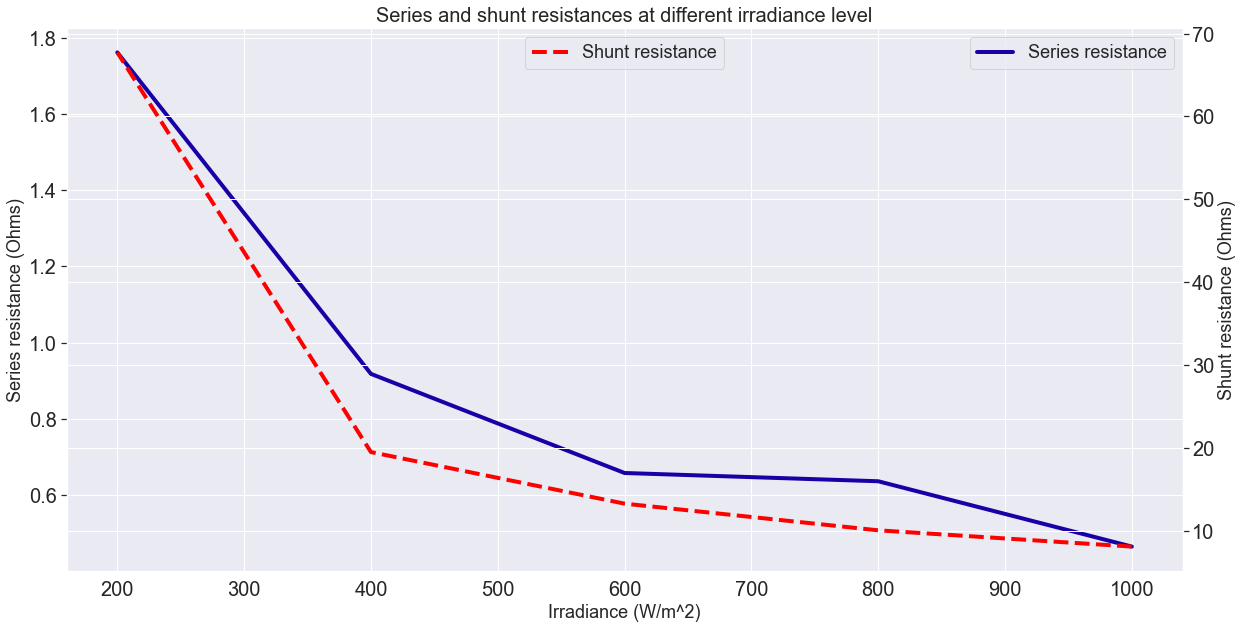

In [88]:
x = new_IV_raw['Irradiance']
y1 = new_IV_raw['R_s']
y2 = new_IV_raw['R_sh']


fig, ax = plt.subplots( figsize=(20,10))
plt.title('Series and shunt resistances at different irradiance level',fontsize=20)
plt.plot(x, y1, linewidth = 4, label = 'Series resistance');
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.xlabel('Irradiance (W/m^2)',fontsize=18)
plt.ylabel ('Series resistance (Ohms)',fontsize=18)

plt.legend(loc='upper right',fontsize=18)

ax2 = ax.twinx()
ax2.plot(x, y2, color = 'red', linestyle = 'dashed',linewidth = 4, label= 'Shunt resistance');
plt.ylabel ('Shunt resistance (Ohms)',fontsize=18)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

plt.legend(loc='upper center',fontsize=18)
